In [10]:
who <- read.csv('../input/life-expectancy-who/Life Expectancy Data.csv')
head(who)
#reading the dataset
summary(who)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<fct>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


                Country          Year             Status     Life.expectancy
 Afghanistan        :  16   Min.   :2000   Developed : 512   Min.   :36.30  
 Albania            :  16   1st Qu.:2004   Developing:2426   1st Qu.:63.10  
 Algeria            :  16   Median :2008                     Median :72.10  
 Angola             :  16   Mean   :2008                     Mean   :69.22  
 Antigua and Barbuda:  16   3rd Qu.:2012                     3rd Qu.:75.70  
 Argentina          :  16   Max.   :2015                     Max.   :89.00  
 (Other)            :2842                                    NA's   :10     
 Adult.Mortality infant.deaths       Alcohol        percentage.expenditure
 Min.   :  1.0   Min.   :   0.0   Min.   : 0.0100   Min.   :    0.000     
 1st Qu.: 74.0   1st Qu.:   0.0   1st Qu.: 0.8775   1st Qu.:    4.685     
 Median :144.0   Median :   3.0   Median : 3.7550   Median :   64.913     
 Mean   :164.8   Mean   :  30.3   Mean   : 4.6029   Mean   :  738.251     
 3rd Qu.:

In [11]:
#Statistics
cat("Number of rows are",nrow(who),"\n")
cat("Number of columns are",ncol(who),"\n")
cat("Number of missing values in the dataset are",sum(is.na(who)),"\n")


#Replacing missing values of a numerical column with the mean of the column.

for(i in 4:ncol(who)){
  who[is.na(who[,i]), i] <- mean(who[,i], na.rm = TRUE)
}


cat("Number of missing values after replacing the missing values with mean are",sum(is.na(who)),"\n")

Number of rows are 2938 
Number of columns are 22 
Number of missing values in the dataset are 2563 
Number of missing values after replacing the missing values with mean are 0 


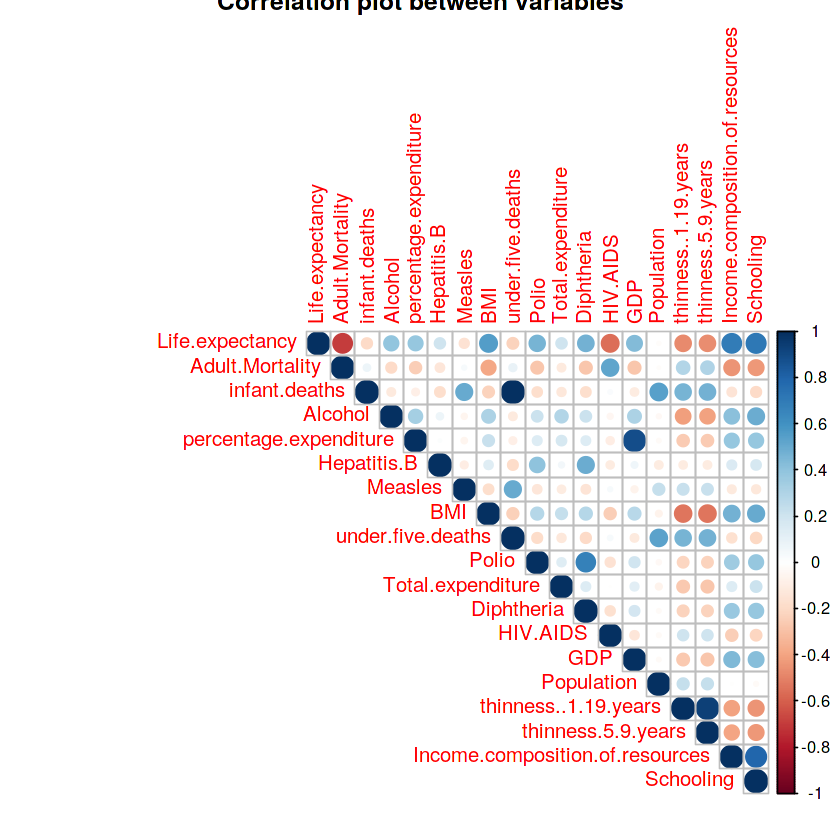

In [12]:
library(corrplot)
corrplot(cor(who[,-c(1:3)]),type="upper",method="circle",title="Correlation plot between variables",mar=c(0.1,0.1,0.1,0.1))

Here, after comparing the correlation plot between variables, we can see that **Infant Deaths are highly positively correlated with Under Five Deaths.** The causes for this correlation might be the fact that many instances of Infant Deaths come under Under Five Deaths.
Same is the case with **GDP and Percentage Expenditure.** They are highly **positively correlated.** 
On the contrary, **Adult Mortality seems to be having a negative correlation with Life Expectancy.**
Adult.Mortality, thinness 1-19 years, thinness 5-9 years , HIV.AIDS are negatively correlated with Life expectancy.

Also, there seems to be multicollinearity present because there is correlation between independent variables.

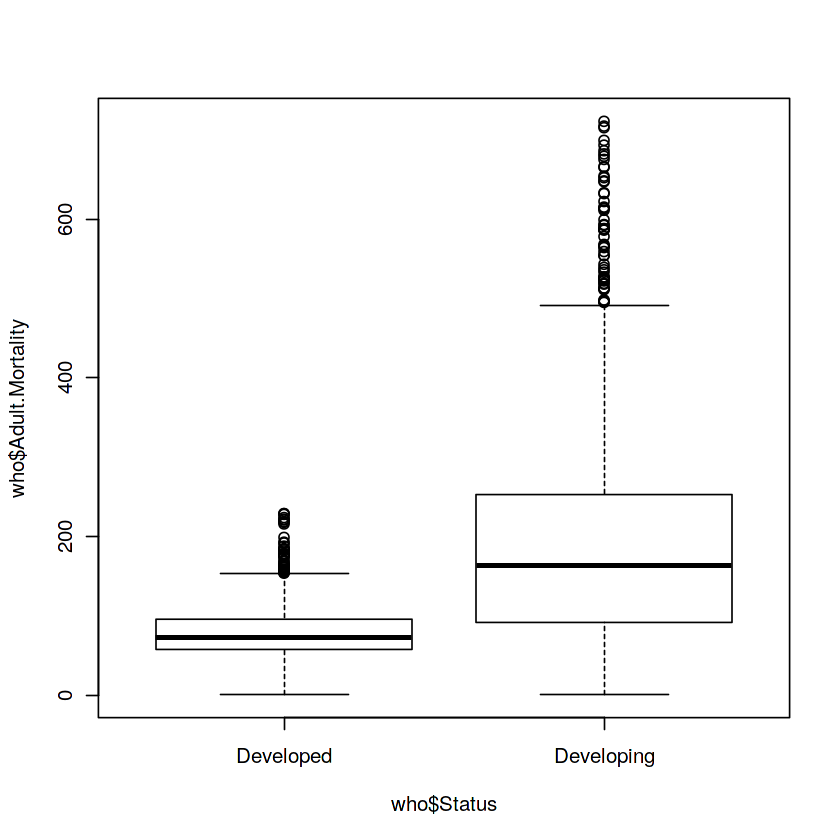

In [15]:
boxplot(who$Adult.Mortality~who$Status)

Comparing the box plot of Adult Mortality in Developing and Developed Countries, we can observe that the number is pretty high in Developing Countries. The reason might be because of lack of facilities and healthcare.

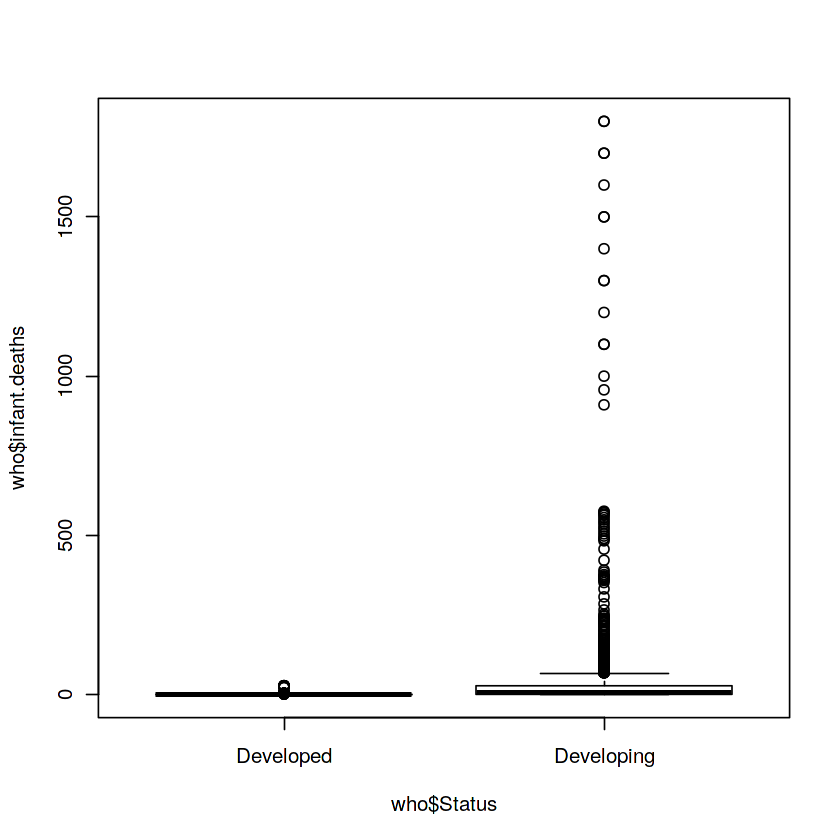

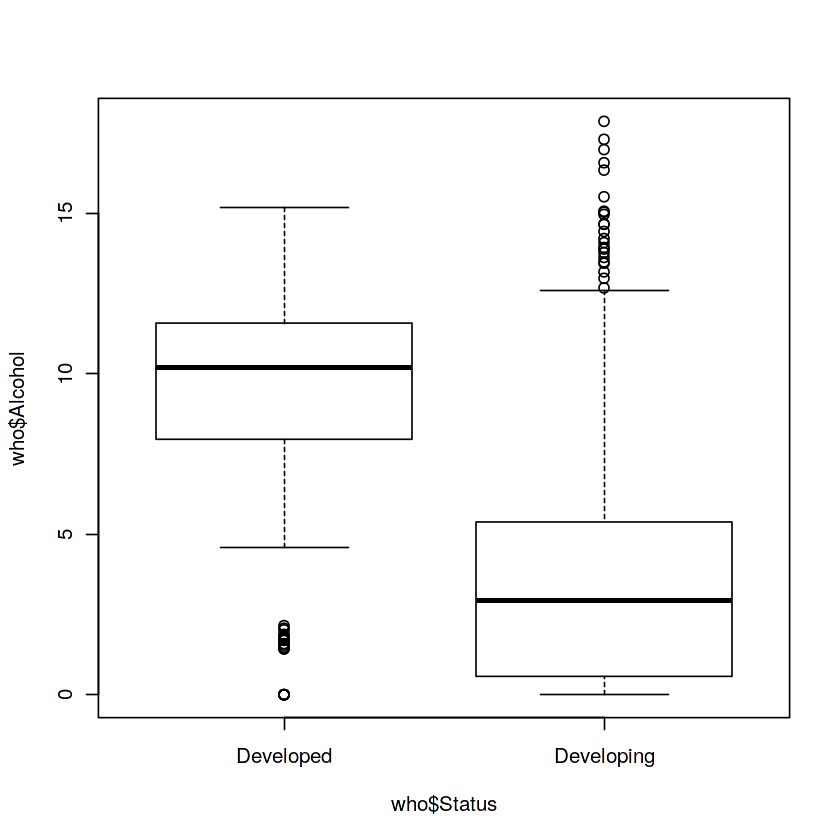

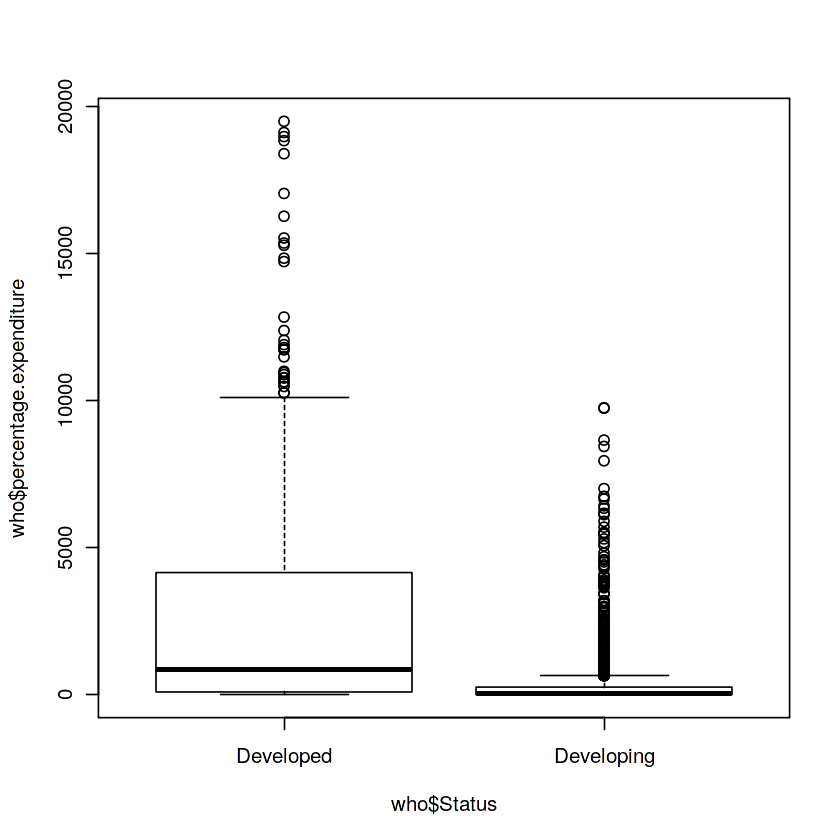

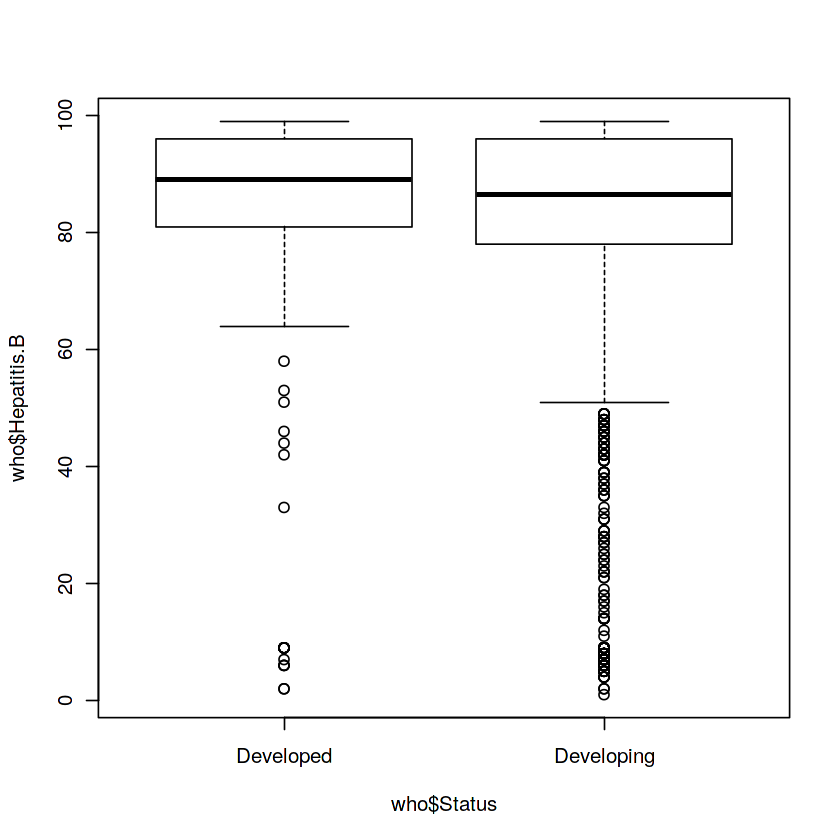

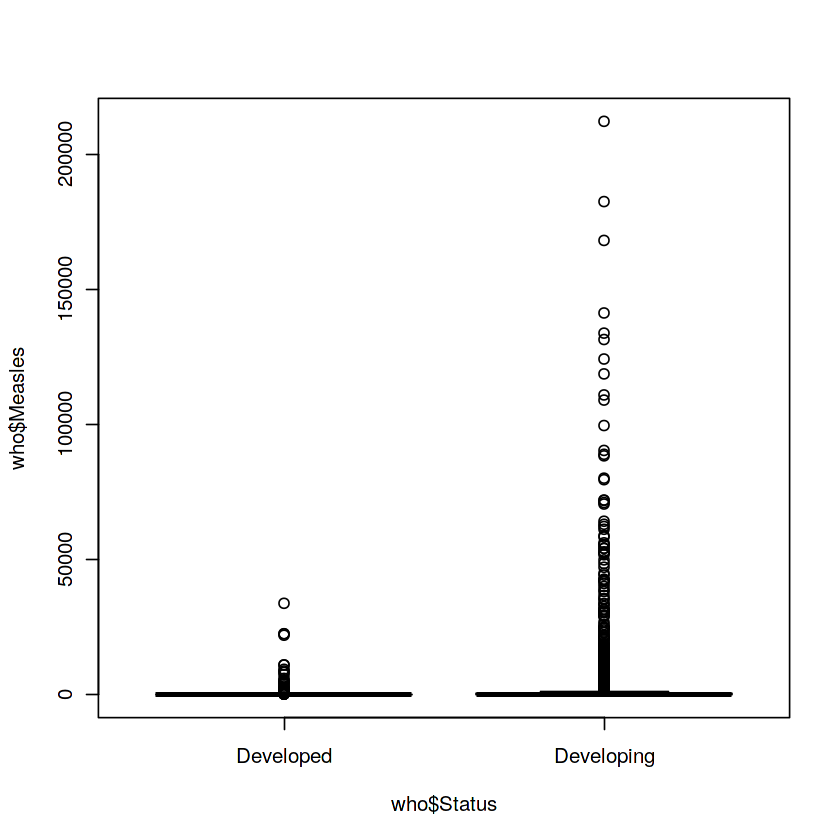

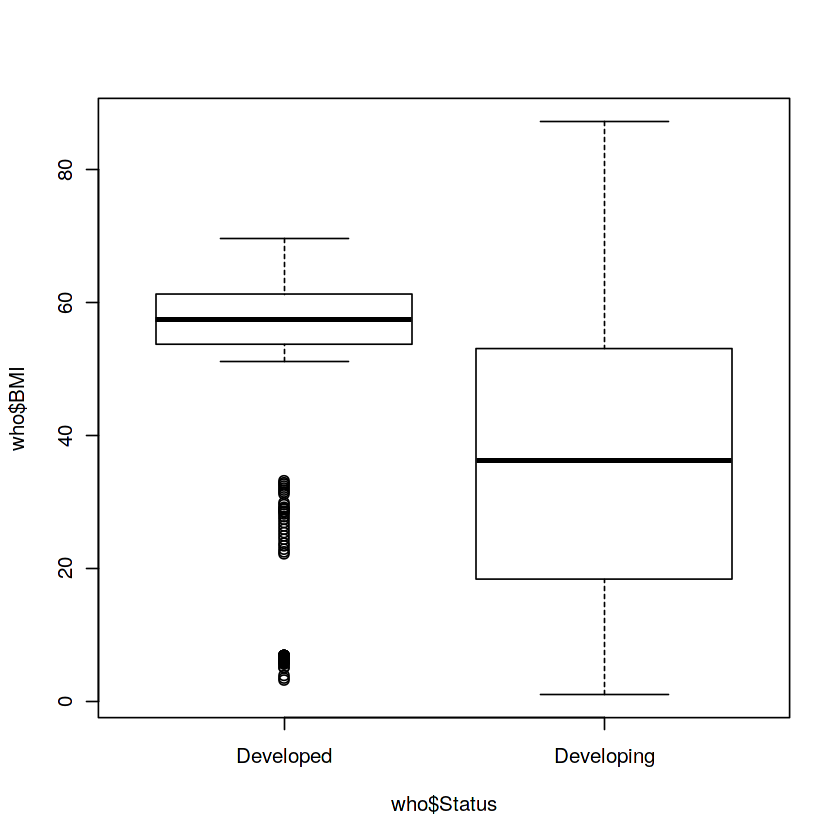

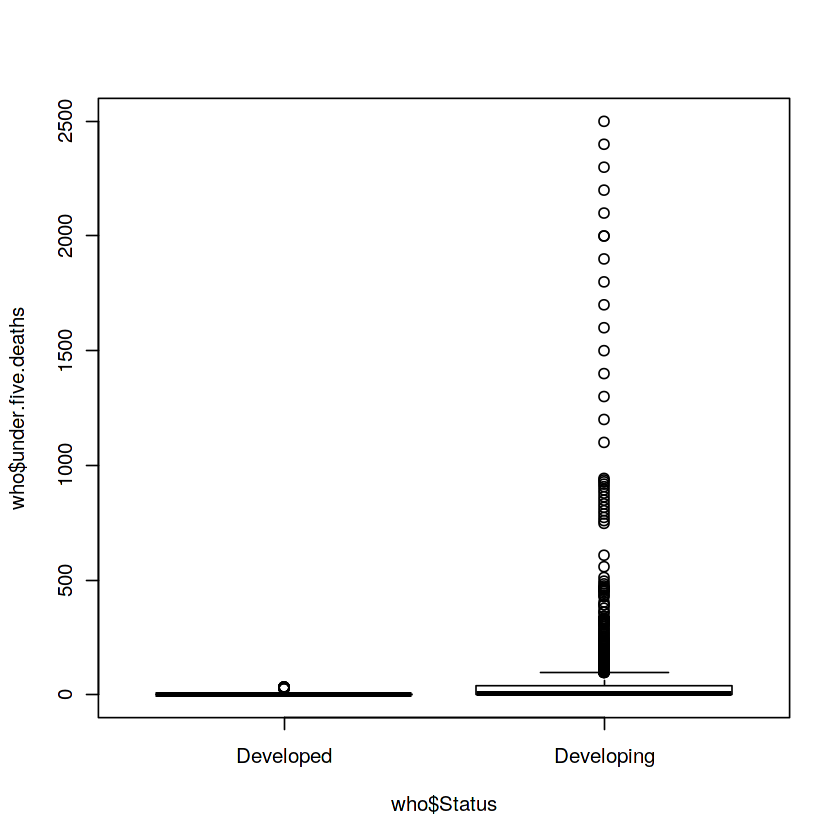

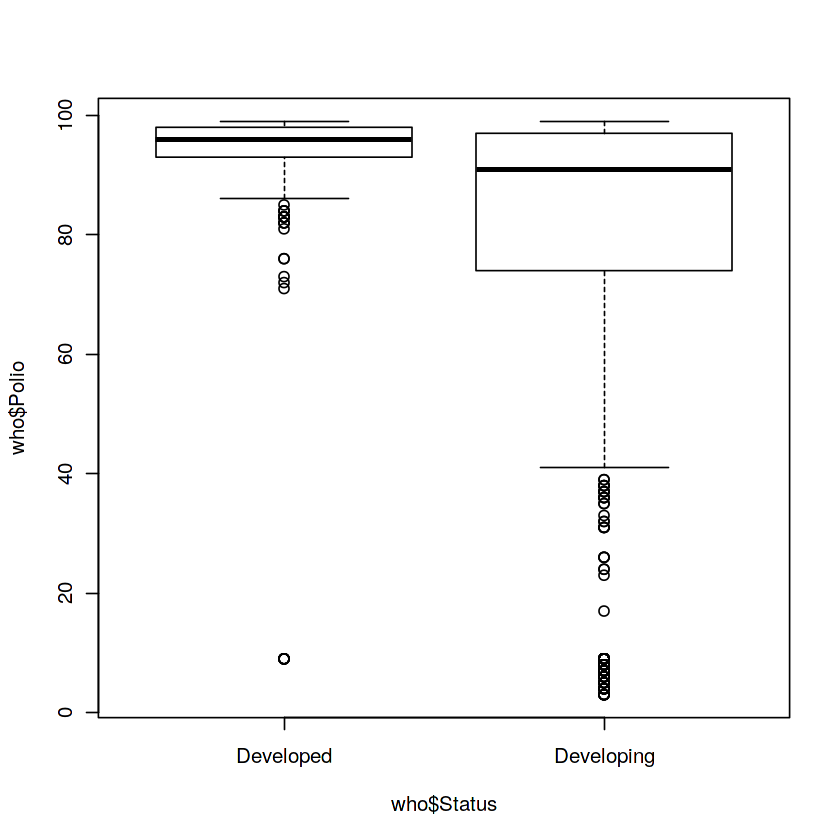

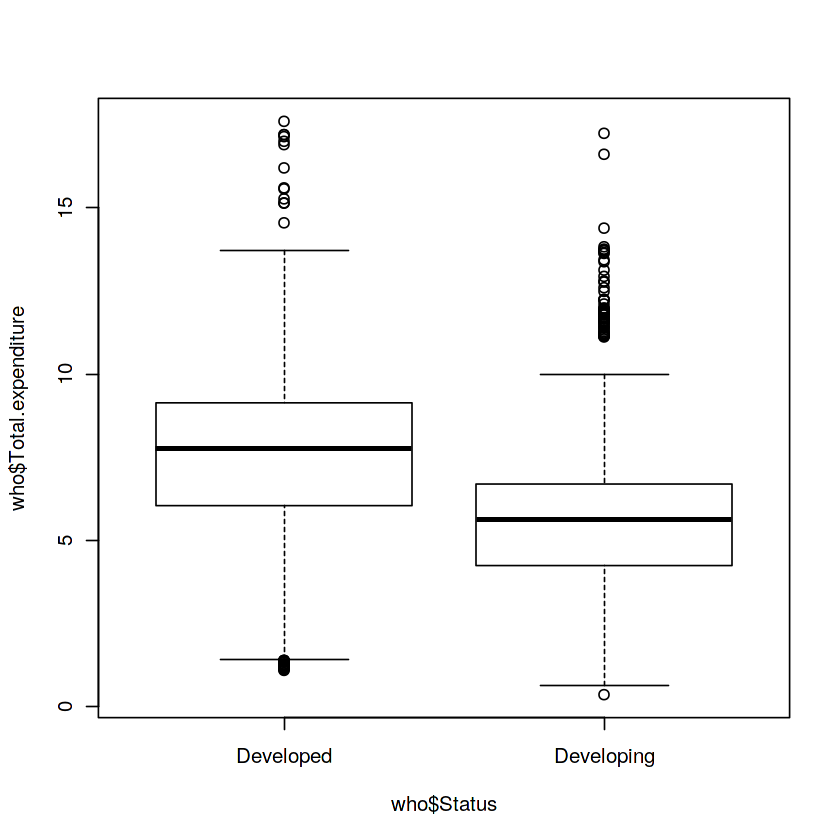

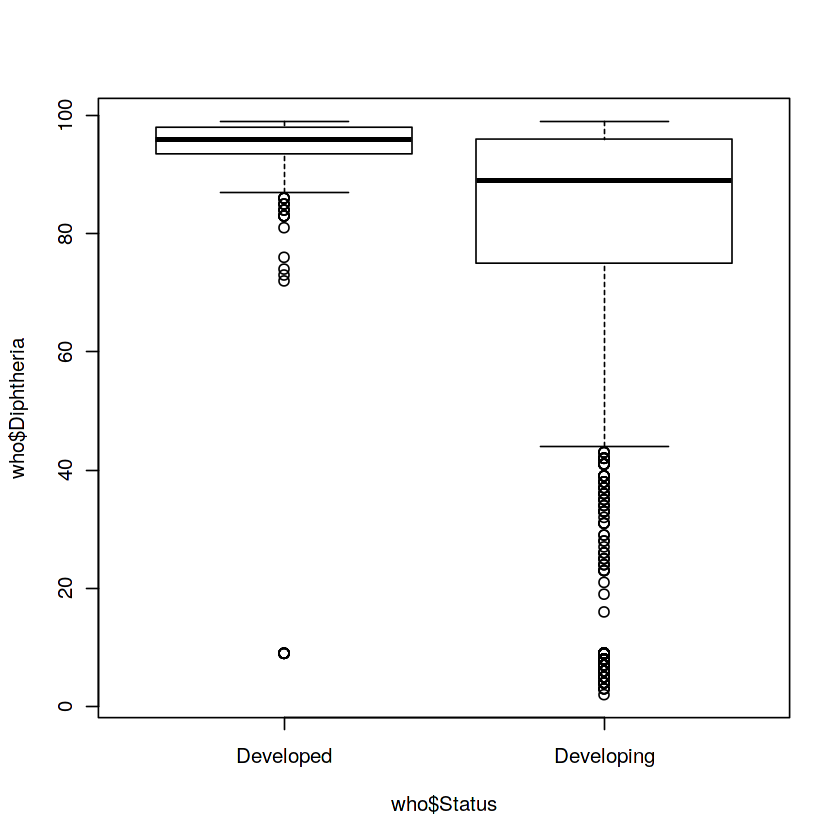

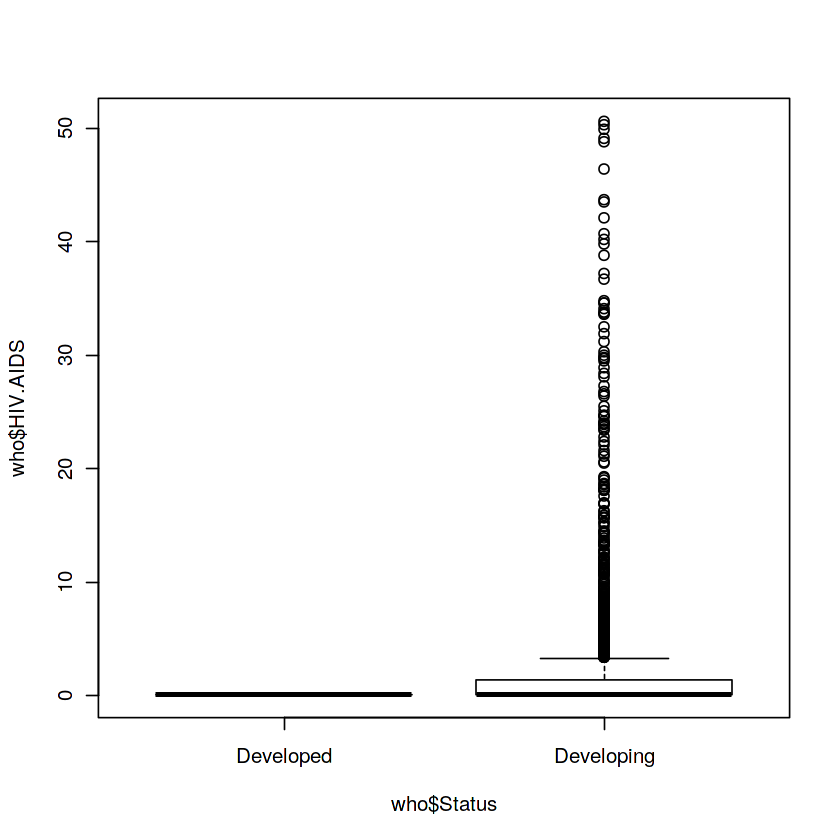

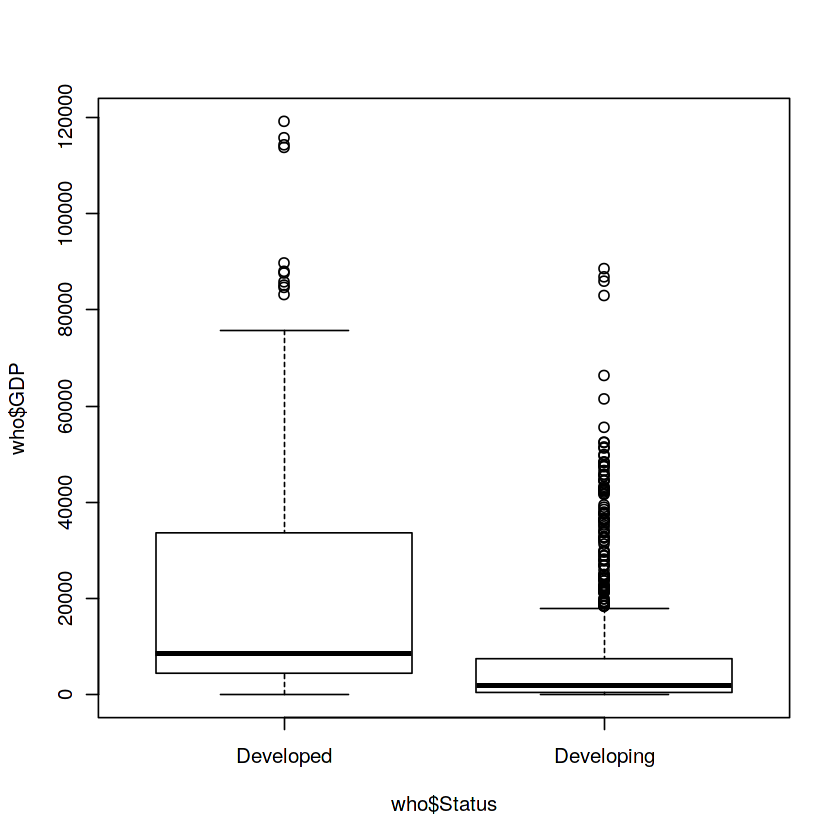

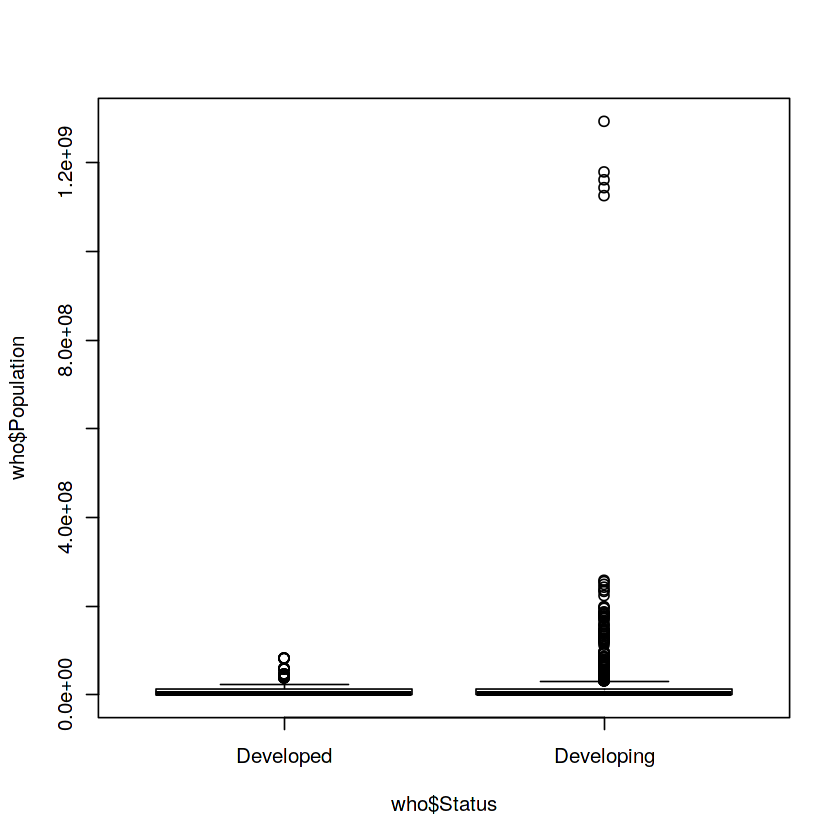

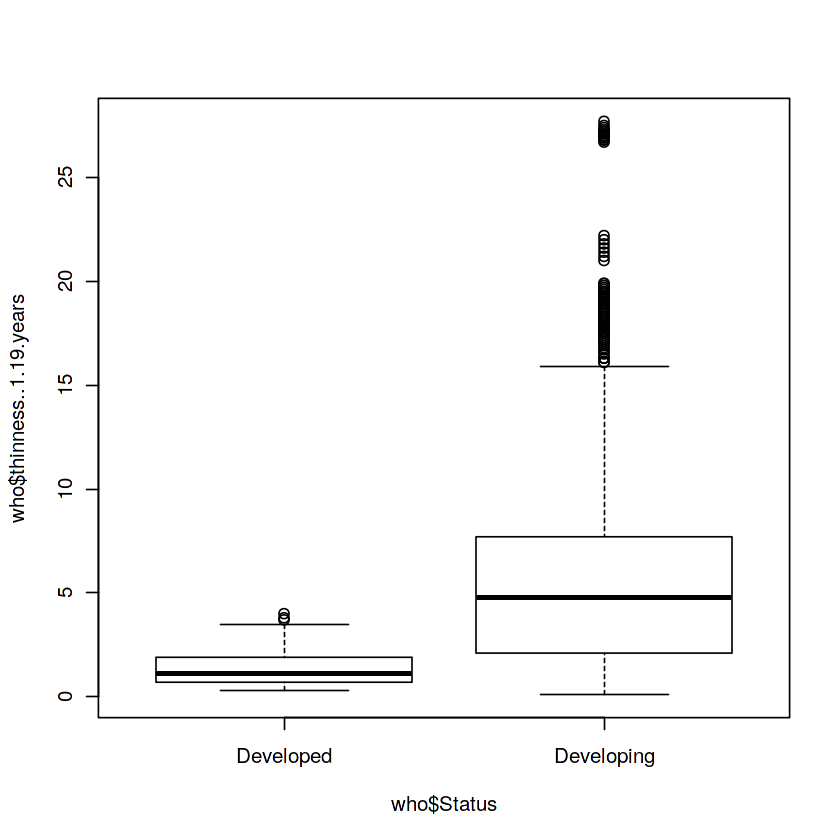

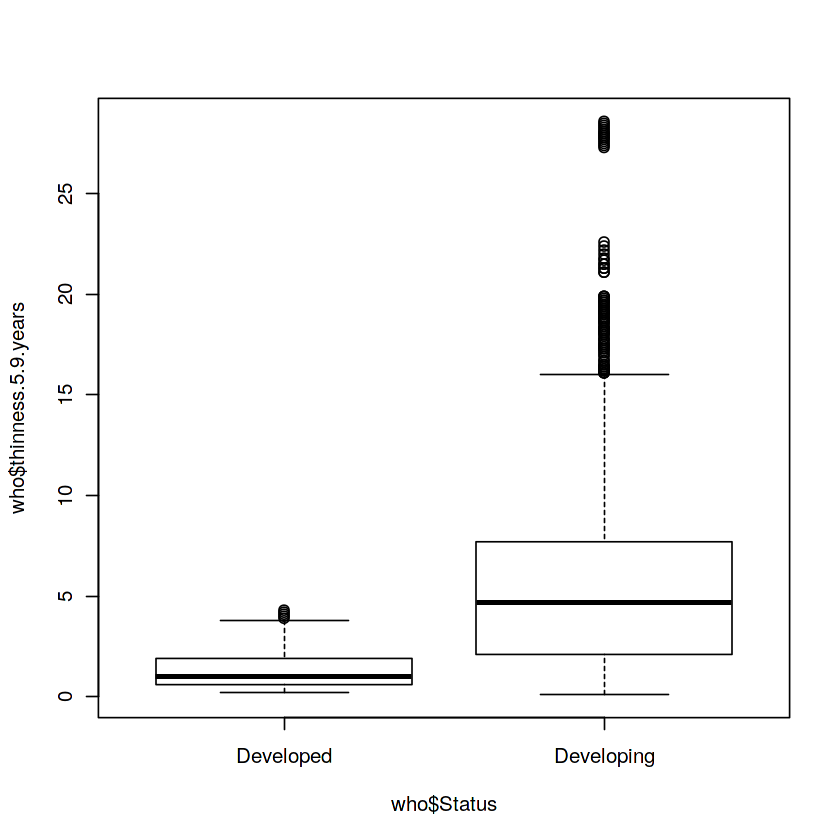

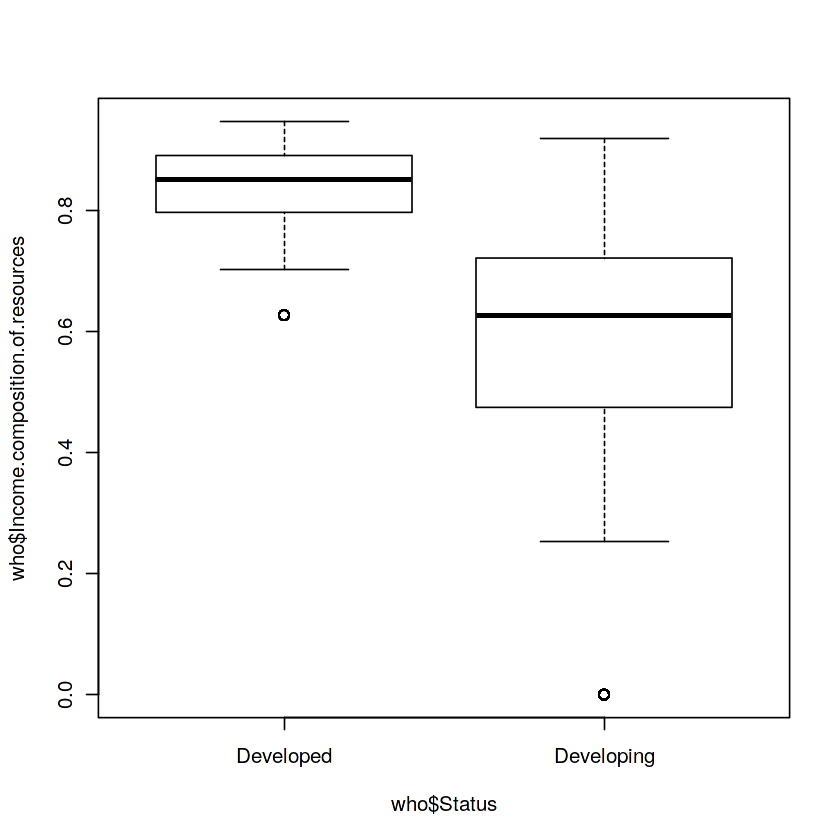

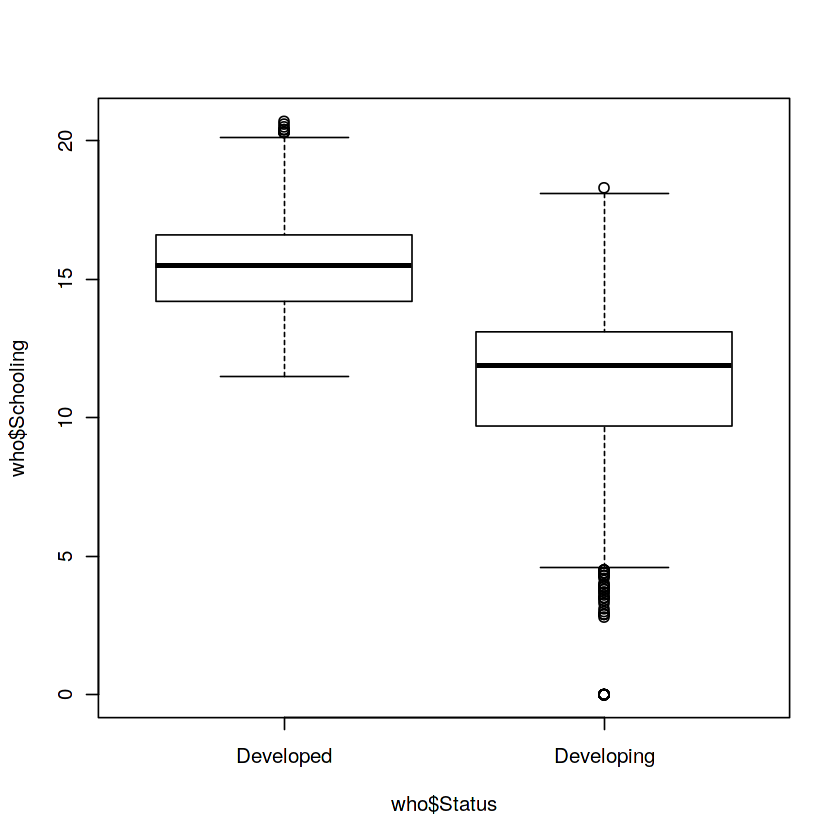

In [19]:
boxplot(who$infant.deaths~who$Status)
boxplot(who$Alcohol~who$Status)
boxplot(who$percentage.expenditure~who$Status)
boxplot(who$Hepatitis.B~who$Status)
boxplot(who$Measles~who$Status)
boxplot(who$BMI~who$Status)#No outliers
boxplot(who$under.five.deaths~who$Status)
boxplot(who$Polio~who$Status)
boxplot(who$Total.expenditure~who$Status)
boxplot(who$Diphtheria~who$Status)
boxplot(who$HIV.AIDS~who$Status)
boxplot(who$GDP~who$Status)
boxplot(who$Population~who$Status)
boxplot(who$thinness..1.19.years~who$Status)
boxplot(who$thinness.5.9.years~who$Status)
boxplot(who$Income.composition.of.resources~who$Status)
boxplot(who$Schooling~who$Status)


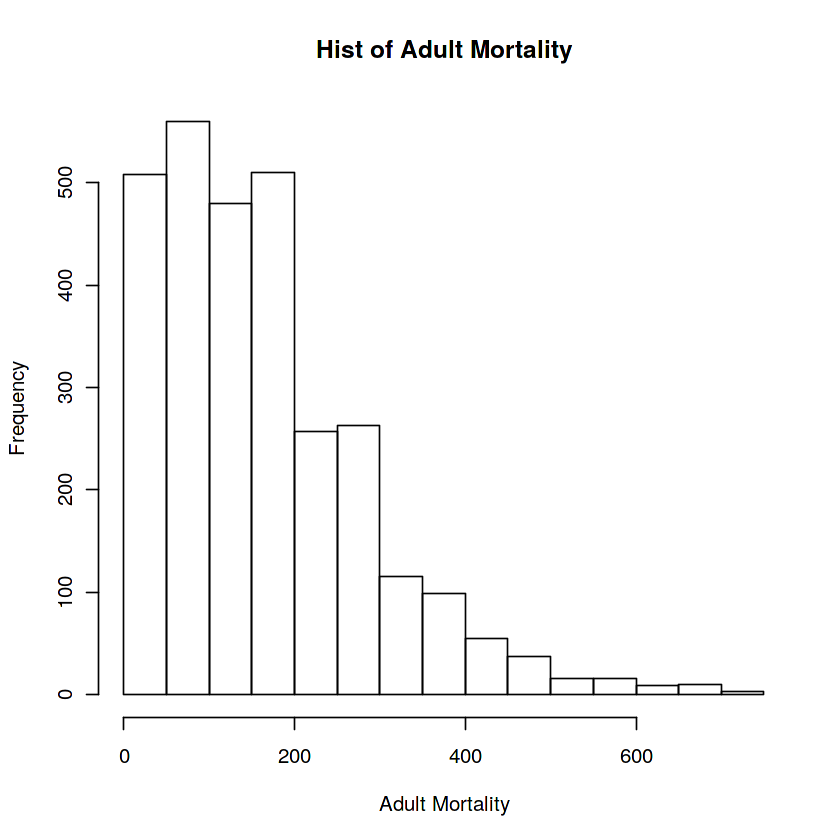

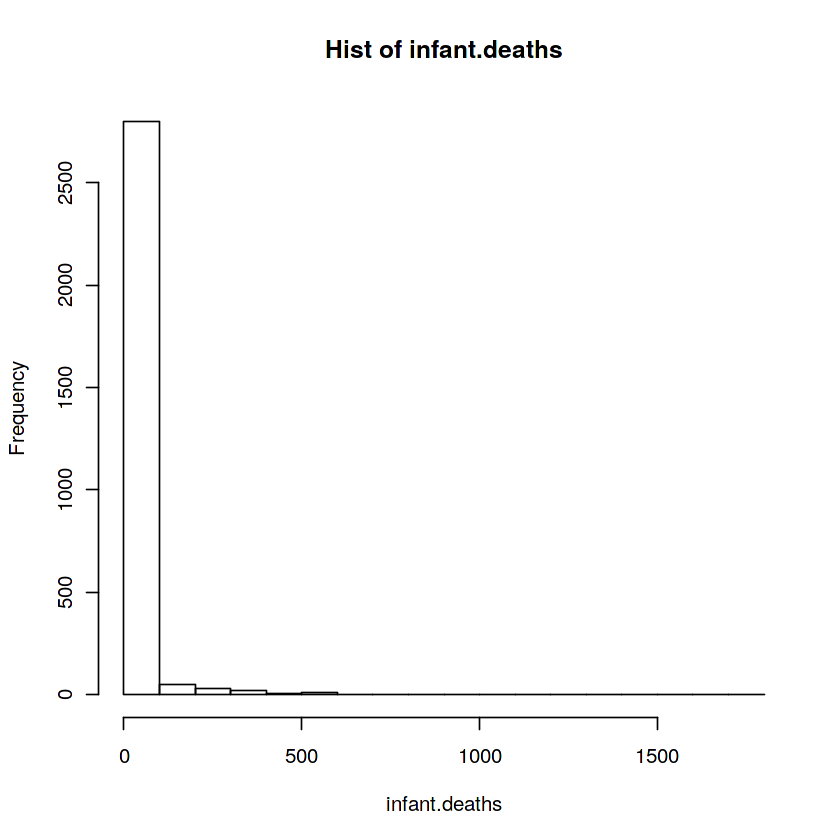

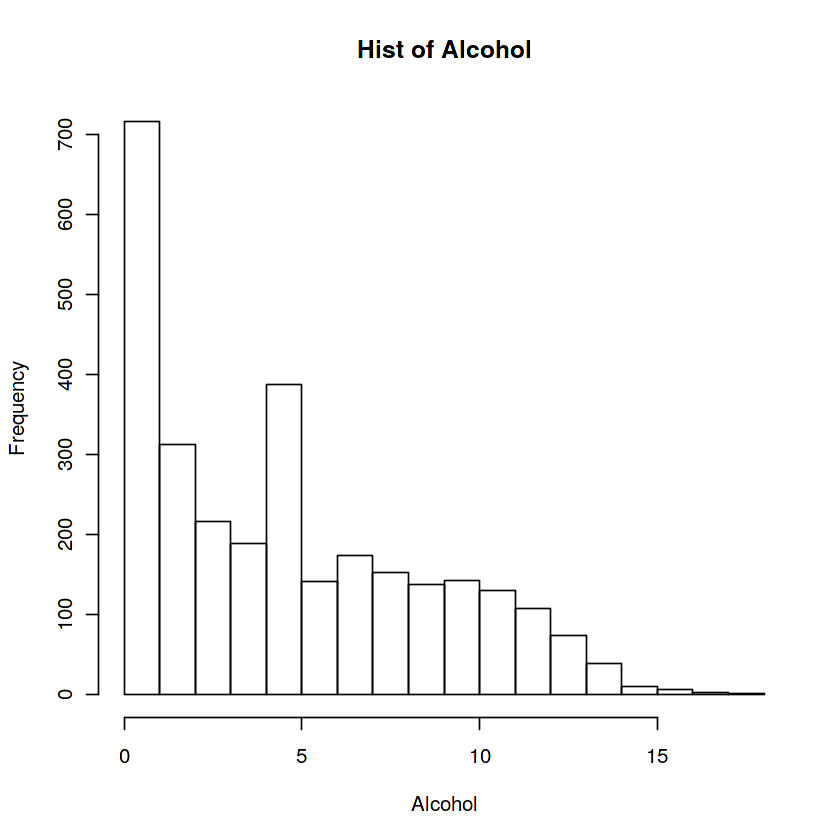

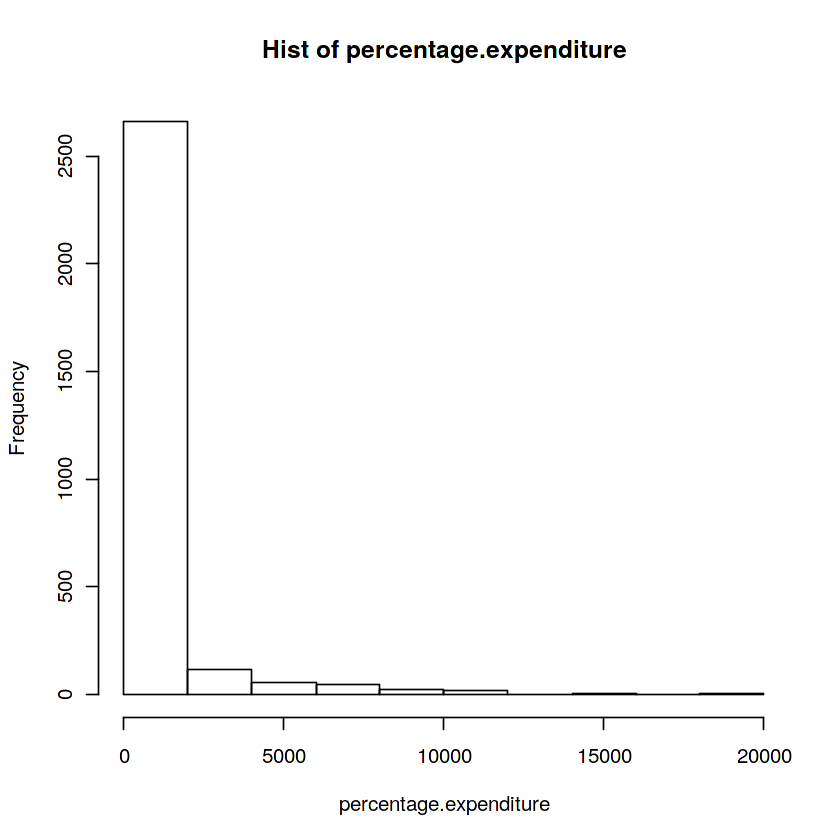

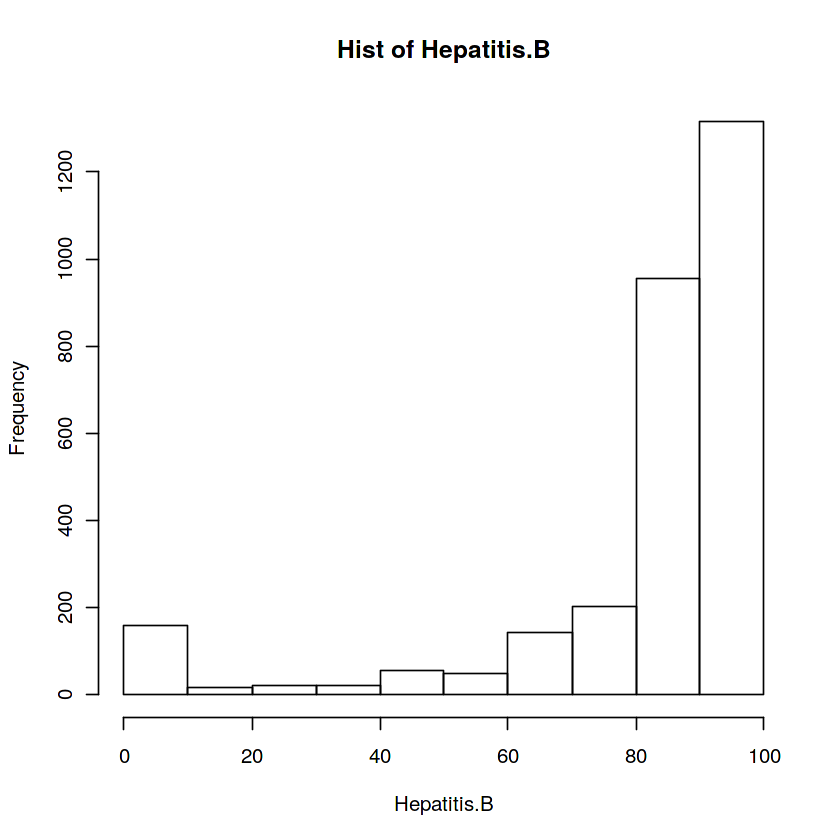

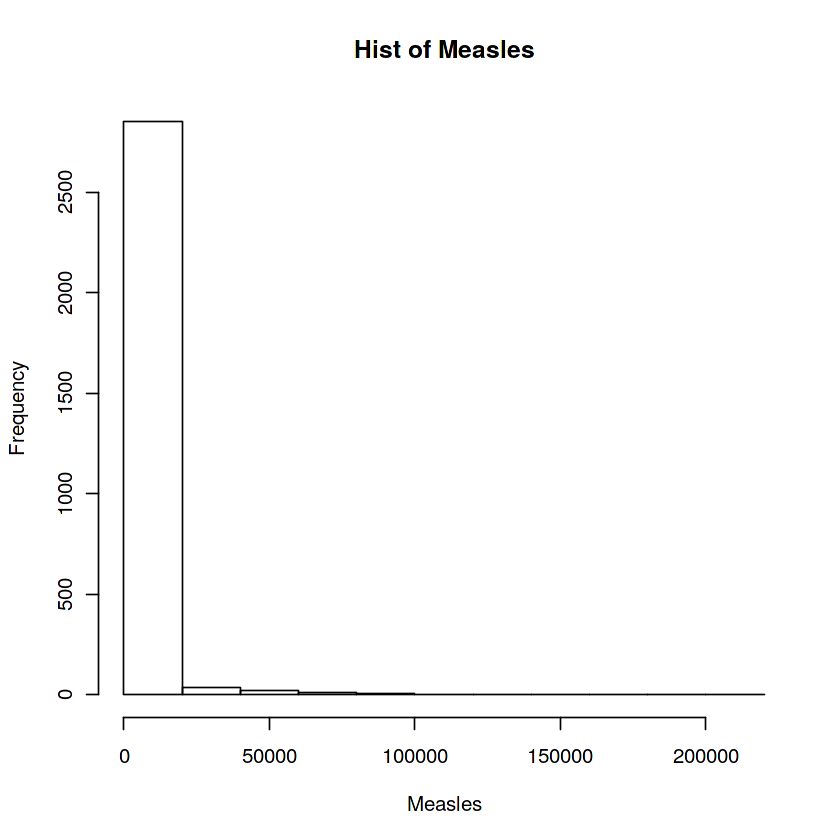

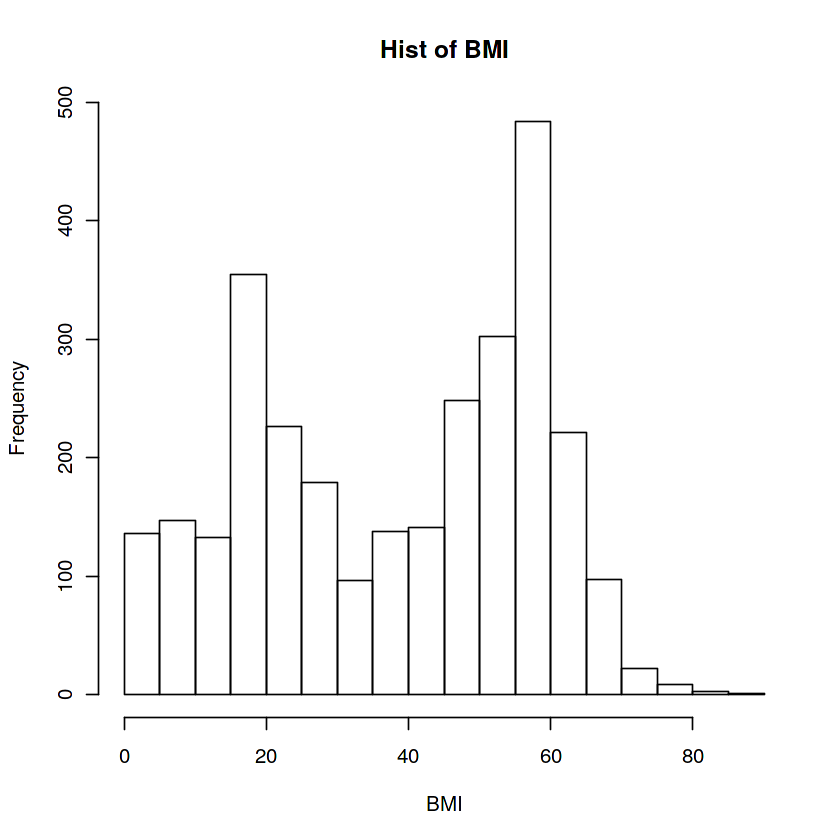

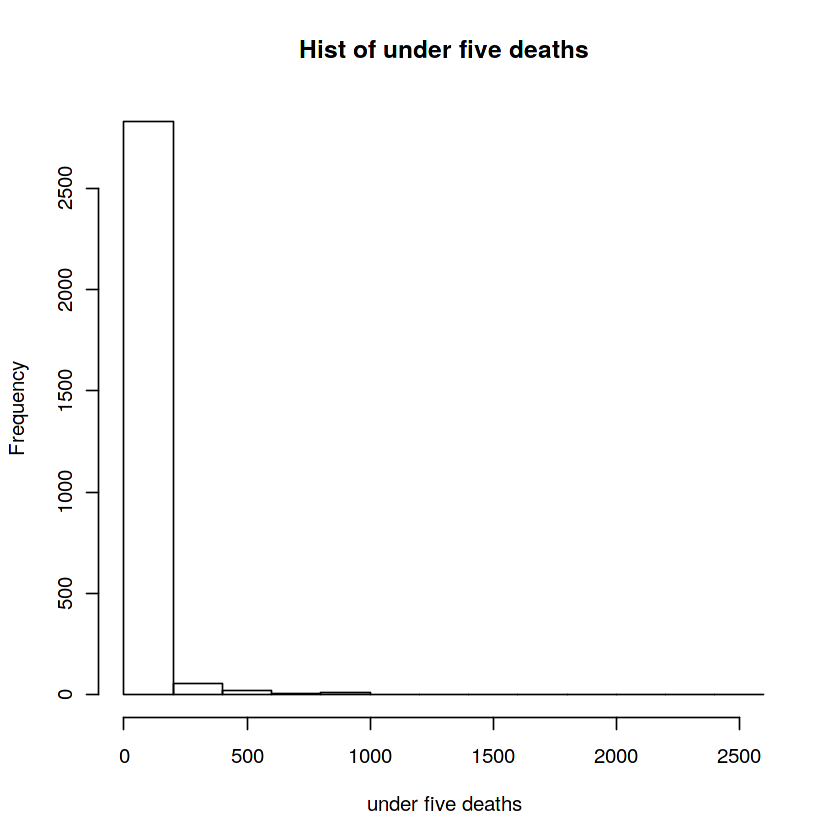

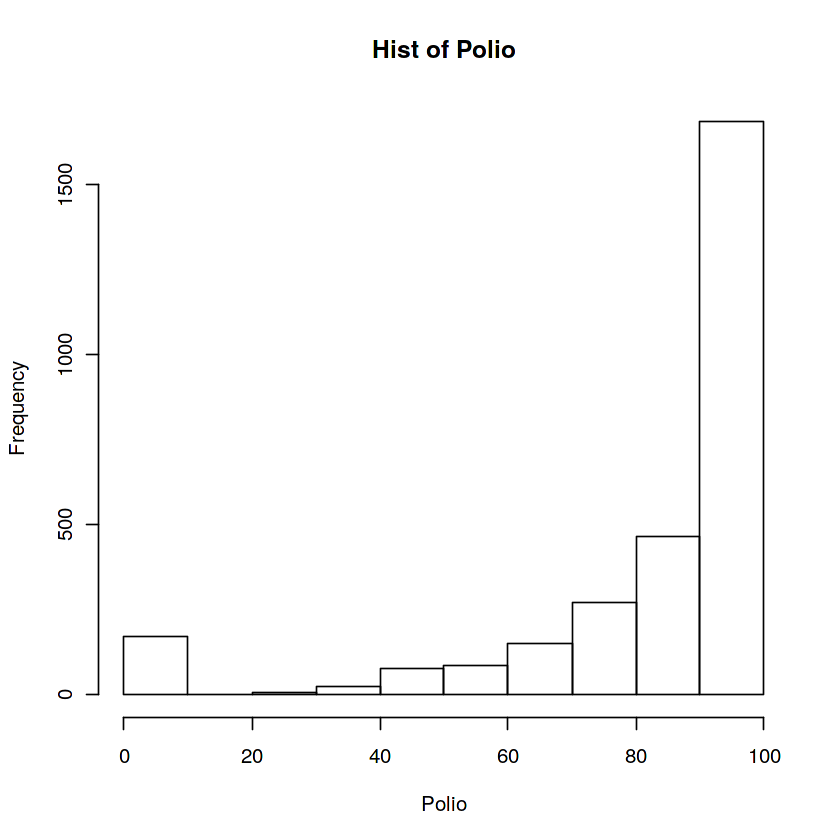

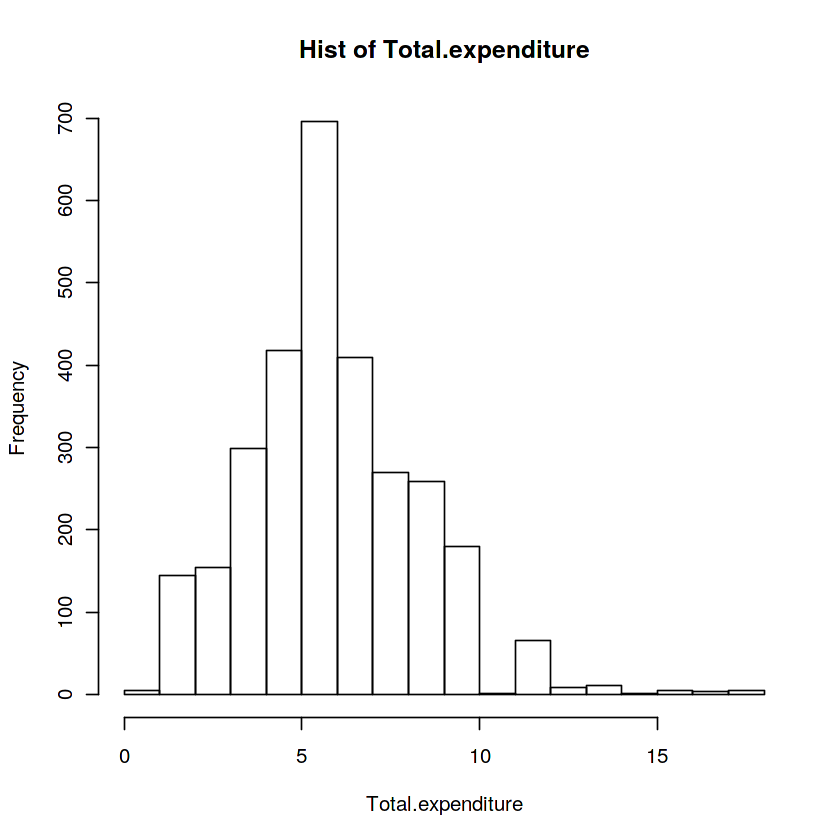

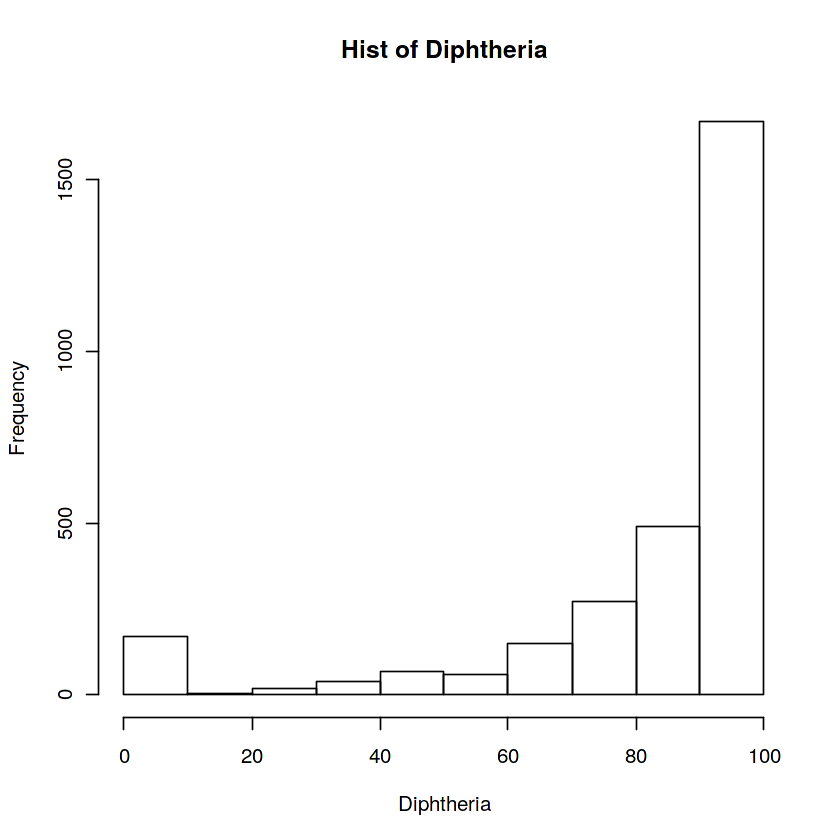

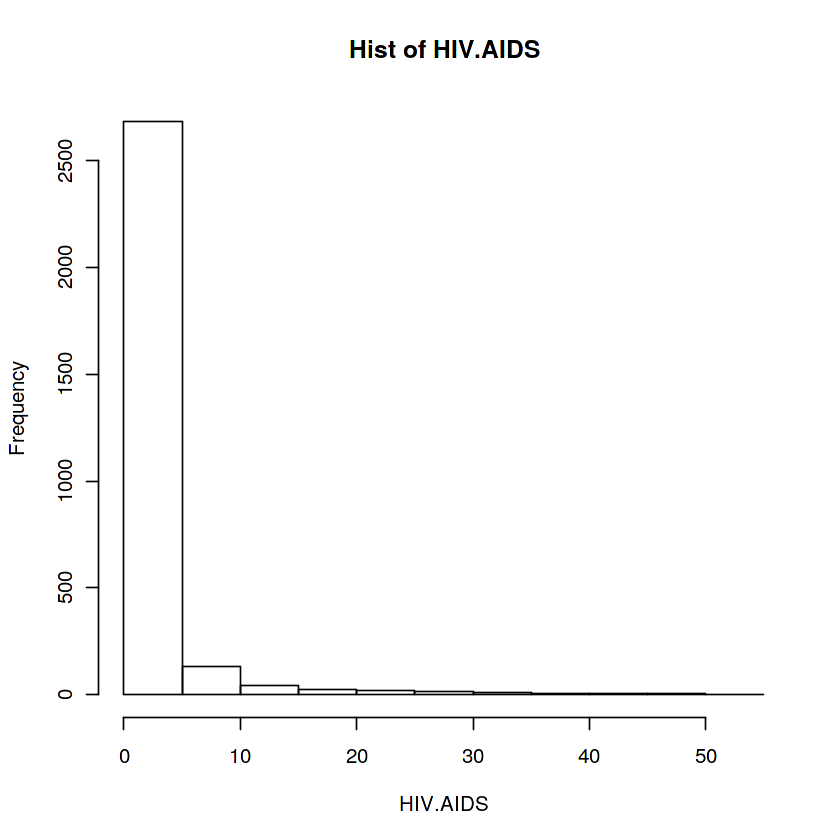

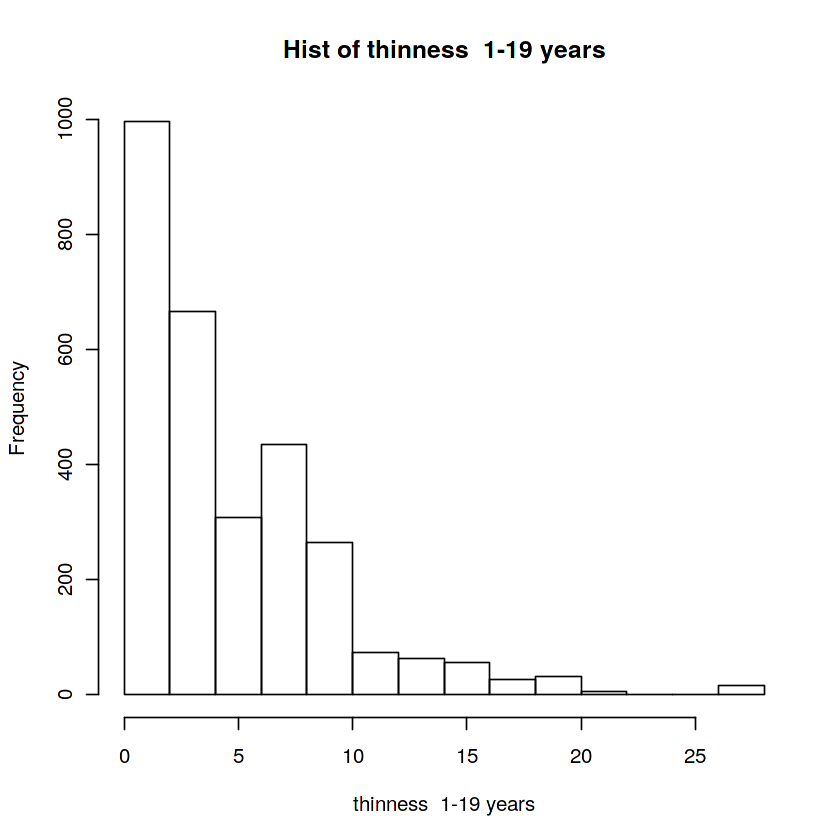

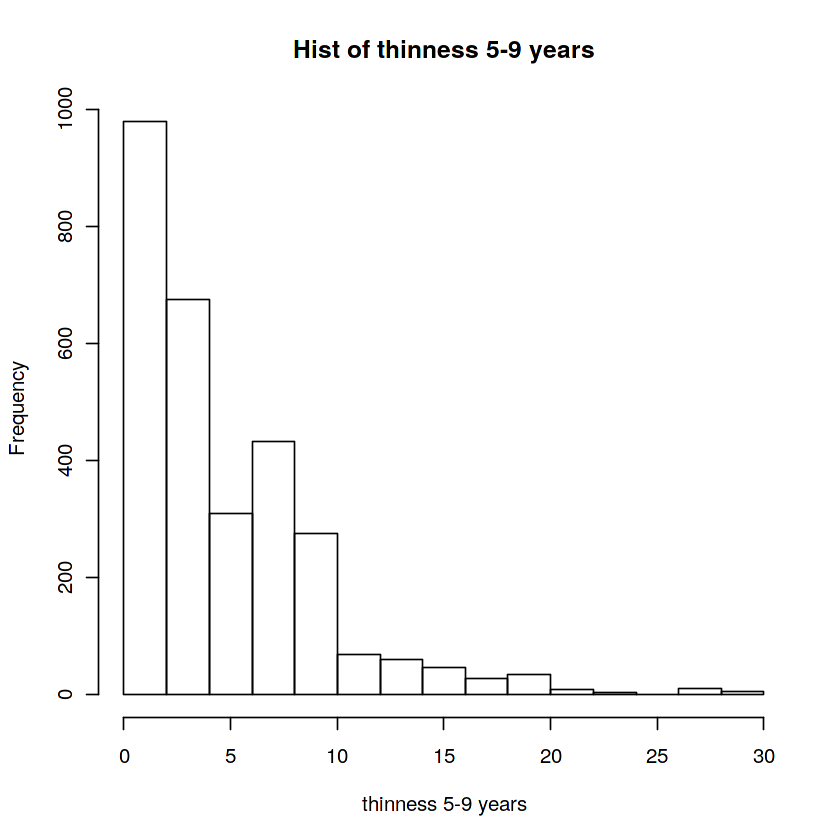

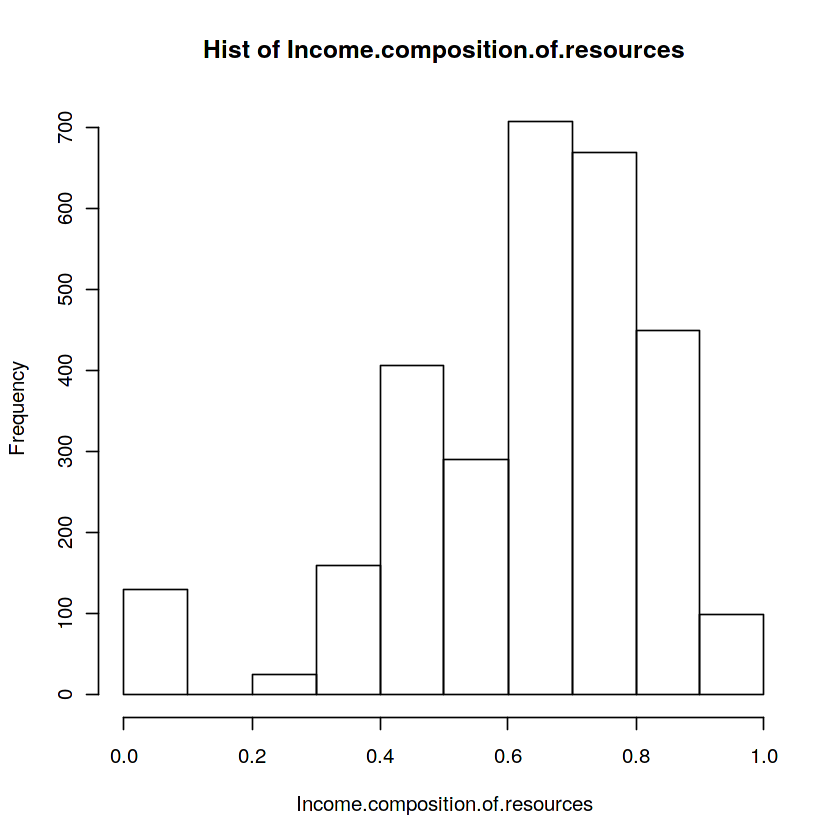

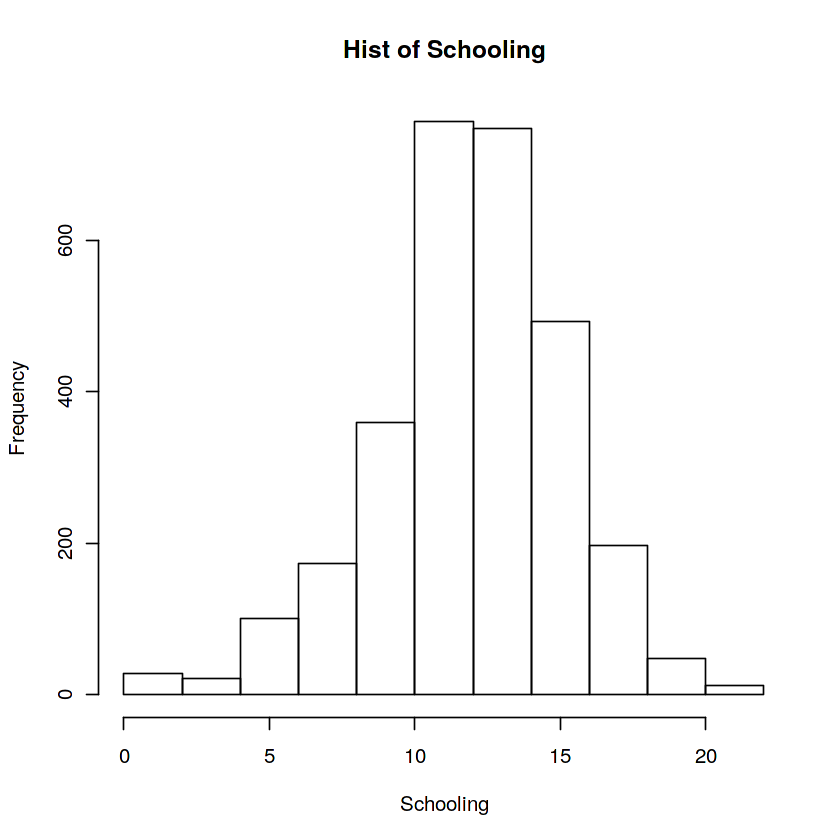

In [21]:
hist(who$Adult.Mortality,main="Hist of Adult Mortality",xlab="Adult Mortality")#Normal distribution
hist(who$infant.deaths,main="Hist of infant.deaths",xlab="infant.deaths")#Skewed at right
hist(who$Alcohol,main="Hist of Alcohol",xlab="Alcohol")#Skewed at right
hist(who$percentage.expenditure,main="Hist of percentage.expenditure",xlab="percentage.expenditure" )#Skewed at right
hist(who$Hepatitis.B,main="Hist of Hepatitis.B",xlab="Hepatitis.B")#Skewed at left
hist(who$Measles,main="Hist of Measles",xlab="Measles")#Skewed at right
hist(who$BMI,main="Hist of BMI",xlab="BMI")#Bimodal
hist(who$under.five.deaths,main="Hist of under five deaths",xlab="under five deaths")
hist(who$Polio,main="Hist of Polio",xlab="Polio")#Skewed at left
hist(who$Total.expenditure,main="Hist of Total.expenditure",xlab="Total.expenditure")#Normal distribution
hist(who$Diphtheria,main="Hist of Diphtheria",xlab="Diphtheria")#Skewed at left
hist(who$HIV.AIDS,main="Hist of HIV.AIDS",xlab="HIV.AIDS")#Skewed at right
hist(who$thinness..1.19.years,main="Hist of thinness  1-19 years",xlab="thinness  1-19 years")#Normal distribution
hist(who$thinness.5.9.years,main="Hist of thinness 5-9 years",xlab="thinness 5-9 years")#Normal distribution
hist(who$Income.composition.of.resources,main="Hist of Income.composition.of.resources",xlab="Income.composition.of.resources")#Normal distribution
hist(who$Schooling,main="Hist of Schooling",xlab="Schooling")#Normal distribution


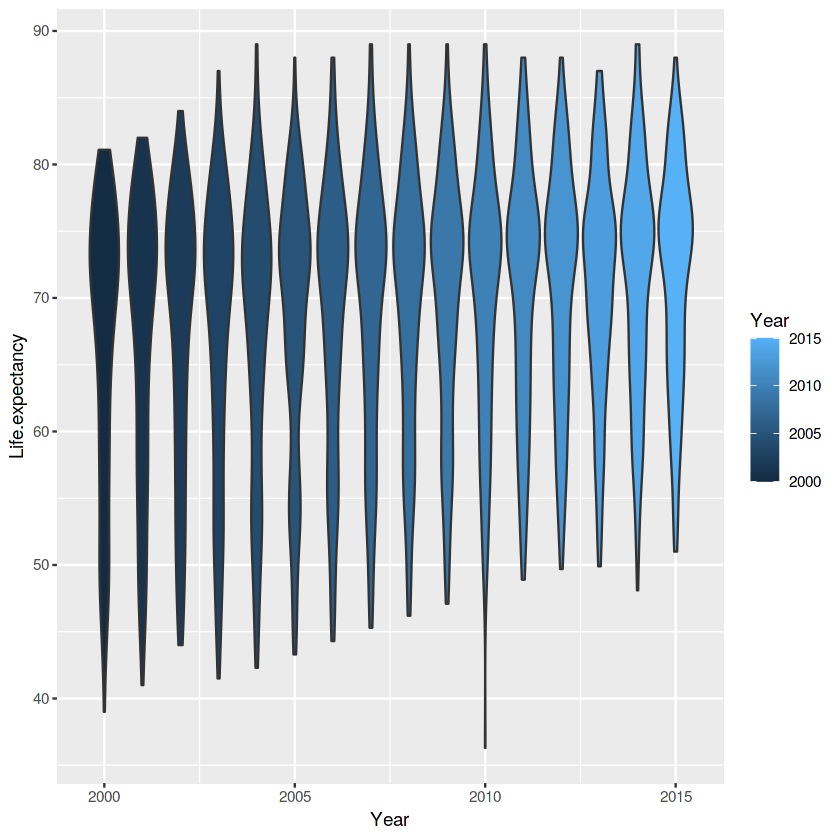

In [33]:

library(ggplot2)
ggplot(who, aes(Year, Life.expectancy,group=Year,fill=Year)) +
  geom_violin()

Here, we can observe that Life Expectancy distribution has gradually increased over the years.


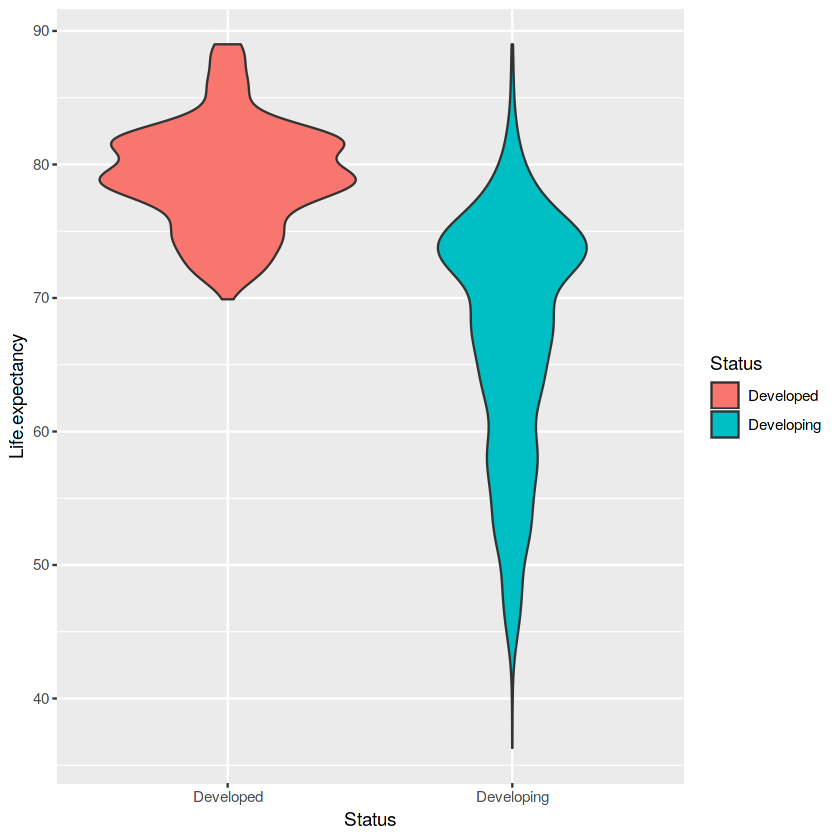

In [34]:
ggplot(who, aes(Status, Life.expectancy,group=Status,fill=Status)) +
  geom_violin()

The life expectancy in developing countries is less than that of Developed countries.